## Исследование данных о продаже видео игр

### Цель исследования:

1. Изучить данные и рассмотреть зависимости между ними.
2. Установить, какие факторы влияют на продажи игр.
3. Проанализировать, как изменялись продажи по платформам.
4. Составить портрет пользователей по регионам.
5. Сделать прогноз, какие данные понадобятся для прогнозирования продаж на 2017 год.

### План работы:

Данные о продажах игр получены из датасета '/datasets/games.csv', о качестве данных в котором нет информации, поэтому я сначала проведу его предобработку и исправлю имеющиеся ошибки, а так же, по возможности, исправлю пропуски, если они есть, создам необходимые столбцы, а потом уже перейду к анализу.
В ходе исследованию установлю тенденции на рынке игр, выделю данные, на основании которых буду проводить дальнейший анализ, построю портрет пользоветеля и найду самые популярные платформы и жанры.

**Описание данных**

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Изучение общей информации

### Откроем файл и посмотрим общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Приведем названия столбцов к единому виду:

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце с оценкой пользователей присутствуют значения tbd, посмотрим, сколько их.

In [5]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2424 строки. По данным Metacritic, это аббревиатура To Be Determined - когда игра имеет недостаточное количество отзывов - менее 4 для подсчета рейтинга. По сути, это так же NaN.

Год релиза точно не может быть не целым числом. Оценка пользователей приведена в десятибальной системе в виде строки. Приведем ее к стобальной и типу с плавающей точкой для упрощения расчетв далее.
В столбце с оценкой пользователей присутствуют значения tbd. Обратим на него внимание.

#### Преобразуем данные к нужному типу:

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
df['critic_score'] = df['critic_score'].astype('float', errors='ignore')  
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].apply(lambda x: x*10)   
df['user_score'] = df['user_score'].astype('float', errors='ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Проверим, в каких столбцах и сколько значений отсутствует:

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропущенные значения из столбцах 'year_of_release', 'name', 'genre' нельзя заменить никакими значениями без искажения данных, поэтому удалим строки с пропущенными значениями.

In [9]:
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [10]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

#### Проверим, имеются ли строки, в которых отсутствуют значения во всех 3 столбцах:

In [11]:
df_nan = df[(df['critic_score'].isna() == True) 
      & (df['user_score'].isna() == True) 
      & (df['rating'].isna() == True)]

6534 строки в датасете с отсутствующими сразу в 3 столбцах данными. Очевидно, что часть данных по играм с низким количеством продаж. И отсутствие значений могут быть следствием невостребованности игр на мировом рынке или выпуске игры для только, например, Японии. 

#### Посмотрим распределение по годам:

In [12]:
df_nan.groupby('year_of_release')['name'].count()

year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     41
1993     60
1994    120
1995    219
1996    255
1997    268
1998    346
1999    296
2000    200
2001    143
2002    174
2003    161
2004    161
2005    232
2006    327
2007    375
2008    440
2009    408
2010    453
2011    419
2012    290
2013    222
2014    231
2015    273
2016    206
Name: name, dtype: int64

Некоторые игры были выпущены во времена, когда даже Metacritic еще не издавался (1999 г), а рейтинг ESRB мог появиться только после появления самой организации, ее выставляющей, в 1994 году. Для некоторых игр однозначно, не хватает данных для оценок, поэтому их не занесли.

Однако, пропуски есть и в данных по играм с большим количеством продаж и с годом выпуска после 1999.

Замена пропусков на средние или медианы в этих строках может исказить данные, а удаление этих строк приведет к потере большого количества строк. Заменим пропуски на численные значения, которые не подходят по смыслу, что бы не спутать с реальными данными. 

#### Для замены пропусков выберем -1:

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

Таким образом, все пропуски были обработаны и не была потеряна значительная часть датасета.

#### Создадим столбец с общим количеством продаж:

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales']+ df['other_sales']

#### Проверим, есть ли в датасете полные дубликаты.

In [15]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Такие строки отсутствуют.

#### Проверим частичные дубликаты.
Одна и та же игра может продаватся на разных платформах, а в разные года могуд выходить дополнения или расширенные версии, поэтому дубликаты проверяем в столбцах 'name', 'platform', 'year_of_release'.

In [16]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,55.0,E,0.01


Можем удалить:

In [17]:
df =  df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')

## Исследовательский анализ данных

#### Посмотрим разброс данных по столбцам.

In [18]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,2006.485921,0.263900,0.145926,0.078492,0.047583,32.976829,31.794806,0.535900
std,5.875546,0.818276,0.506731,0.311109,0.188006,36.301955,37.370227,1.558753
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,73.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000,82.540000


#### Построим гистограммы:

Поскольку датасет приведен за 37 лет, на гистограммах удобнее всего выбрать именно такую разбивку по годам. А диапазон значений выберем из соображений распределения значений, что бы гистограммы были максимально наглядными.

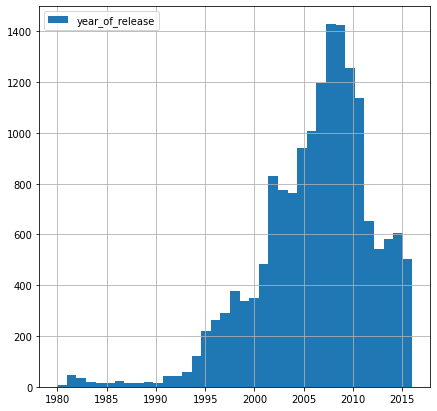

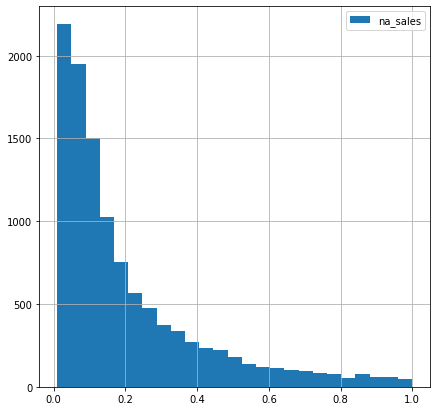

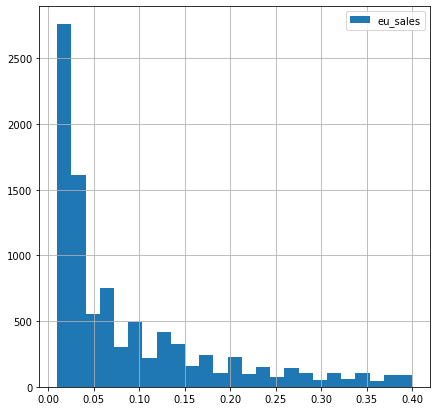

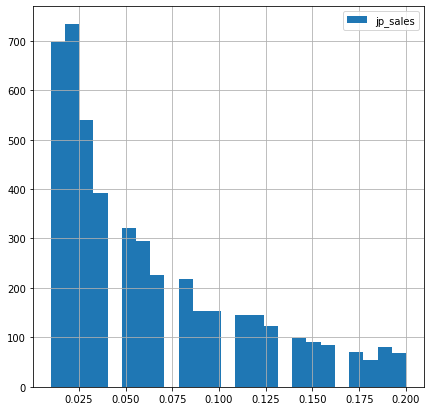

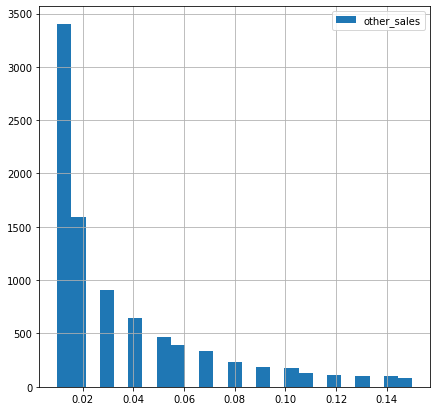

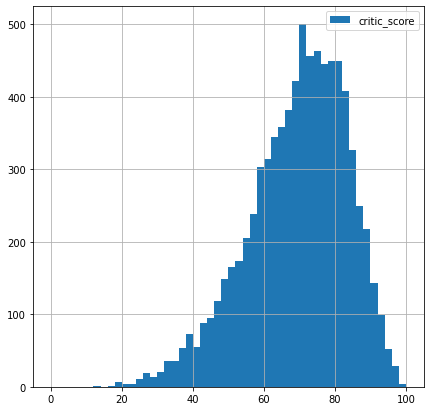

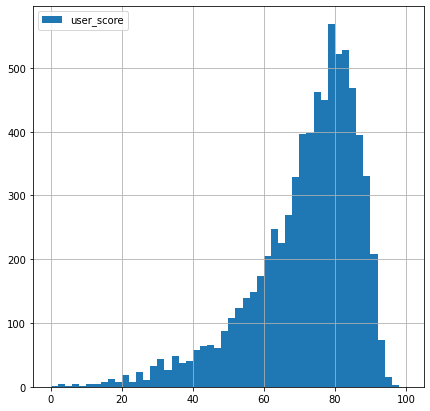

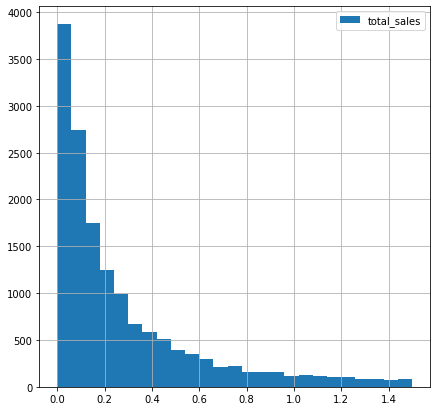

In [19]:
df['year_of_release'].hist(bins=37, figsize=(7, 7), legend=True)
plt.show()
df['na_sales'].hist(bins=25, figsize=(7, 7), range=(0.01, 1), legend=True)
plt.show()
df['eu_sales'].hist(bins=25, figsize=(7, 7), range=(0.01, 0.4), legend=True)
plt.show()
df['jp_sales'].hist(bins=25, figsize=(7, 7), range=(0.01, 0.2), legend=True)
plt.show()
df['other_sales'].hist(bins=25, figsize=(7, 7), range=(0.01, 0.15), legend=True)
plt.show()
df['critic_score'].hist(bins=50, figsize=(7, 7), range=(0, 100), legend=True)
plt.show()
df['user_score'].hist(bins=50, figsize=(7, 7), range=(0, 100), legend=True)
plt.show()
df['total_sales'].hist(bins=25, figsize=(7, 7), range=(0, 1.5), legend=True)
plt.show()

#### И "Ящик с усами":

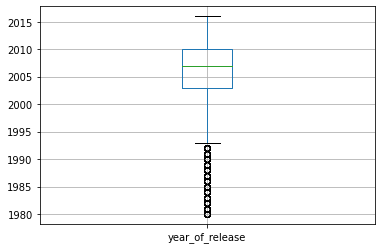

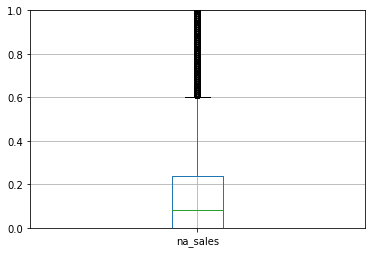

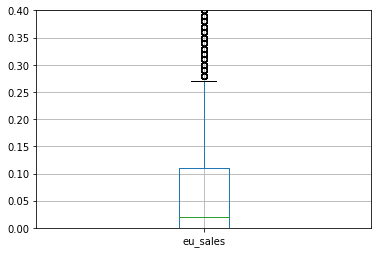

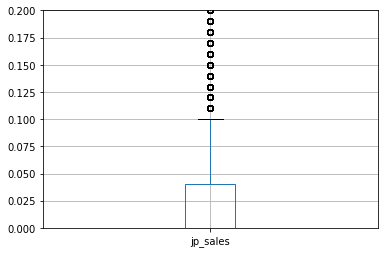

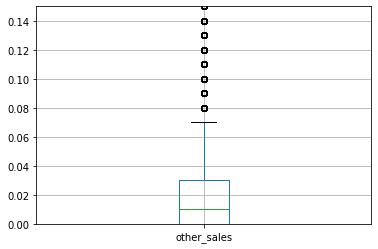

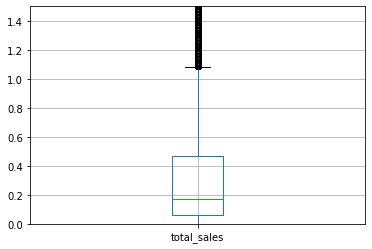

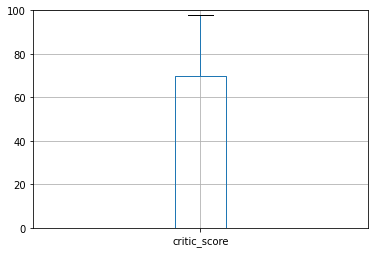

<AxesSubplot:>

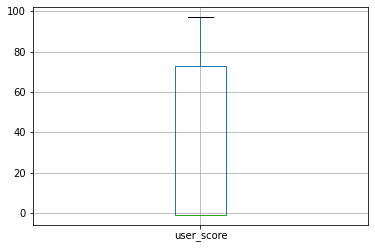

In [20]:
df.boxplot(column='year_of_release')
plt.show()

plt.ylim(0, 1)
df.boxplot(column='na_sales')
plt.show()

plt.ylim(0, 0.4)
df.boxplot(column='eu_sales')
plt.show()

plt.ylim(0, 0.2)
df.boxplot(column='jp_sales')
plt.show()

plt.ylim(0, 0.15)
df.boxplot(column='other_sales')
plt.show()


plt.ylim(0, 1.5)
df.boxplot(column='total_sales')
plt.show()


plt.ylim(0, 100)
df.boxplot(column='critic_score')
plt.show()
df.boxplot(column='user_score')

#### Проверим, сколько игр выпускалось по годам:

In [21]:
df.groupby('year_of_release')['user_score'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: user_score, dtype: int64

На основании данных выше, можно сказать, что до 1995 года игр почти не было - компьютер в доме - роскошь, резкий скачок по количеству выпущенных игр же произошел в 2002, достигнув пика в 2008-2009 гг, а с 2012 г наблюдается снижение количества выпущенных игр, что может быть связано с популярностью мобильных игр и приложений.

Большое количество игр практически не продавались в некоторых регионах (или на момент составления датасета только начали продаваться).

Так же, интересным наблюдением является факт, что "на вкус все фломастеры разные" и все игры нравятся и не нравятся не одинаково-игр ни с нуливым, ни с максимыльным баллом нет.

#### Проверим, какие суммы от продаж были по годам:

In [22]:
import warnings

warnings.filterwarnings("ignore")

In [23]:
df.groupby('year_of_release')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,19.81,1.93,37.08
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


спасибо)

Времена меняются, меняется и покупательский спрос и паттерны поведения покупателей. И то, что было актуально 30 лет назад, уже давно не актуально. 

Прогнозировать продажи на следующие годы лучше всего по тем данным, которые максимально близки ко времени, на которое планируется прогноз.

Снижение количества выпускаемых игр произошло с 2012 года, эти данные и лучше всего брать для построения модели прогноза. Данные по суммарным продажам по регионам и совместные подтверждают мое предположение - продажи падают.

Причем, интересным является факт, что в 2010-2011 гг снижение выпуска игр было не таким сильным, но суммарное количество продаж просело на более, чем 10% и игровая индустрия сильно изменилась - в следующие годы уже было выпущено меньше игр.

#### Посмотрим, как менялись продажи по платформам:

In [24]:
df_platform_top = df.groupby('platform')['total_sales'].sum() 
df_platform_top.sort_values(ascending=False)[0:10]

platform
PS2     1233.56
X360     961.24
PS3      928.78
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Четко видна шестерка платформ-лидеров. 

#### Построим график продаж на этих платформах по годам:

In [25]:
top_platforms = df_platform_top.sort_values(ascending=False)[0:6].index.get_level_values
top_platforms

<bound method Index._get_level_values of Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')>

In [26]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [27]:
df_top = df.loc[df['platform']. isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
df_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16429,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,-1,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


Итак, мы получили датафрейм по топ-6 платформам. Построим график распределения по годам:

In [28]:
df_top_pivot = df_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_top_pivot

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


<AxesSubplot:xlabel='year_of_release'>

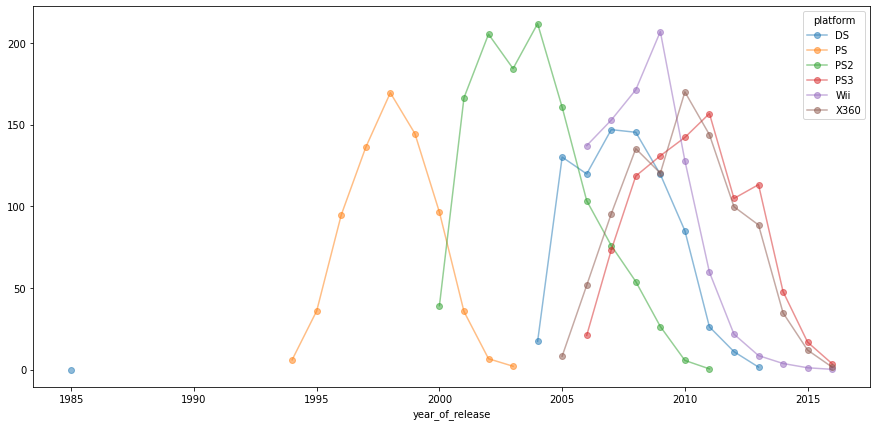

In [29]:
df_top_pivot.plot(kind='line', style='-o', alpha=0.5, figsize=(15, 7))

Итак, 3 платформы в топе по продажам и еще не умерли на момент составления датафрейма-"X360", "Wii", "PS3".
Остальные же ТОПы выпуск игр уже прекратили. Интересно, что из этого списка DS продавали игры в 1985, потом был период затишья, а затем снова продажи в 2004-2013 гг.

Судя по графику для ТОПов, в среднем, они "живут" около 10 лет. При этом, все еще существующие на момент составления датасета ТОПы существуют уже 10-11 лет. Прогнозирую и их скорое "завершение карьеры" и образование новых лидеров.

Причем, по графикам видно, что пик продаж на этих платформах проходился на 2009-2012 годы, затем продажи пошли на спад.

Для построения дальнейшей модели возьмом данные за последние 3 года, которые отражают уже сложившийся спад продаж.

#### Создадим новый датасет с данными за актуальный период:

In [30]:
df_actual_years = df.loc[df['year_of_release'] > 2013]

df_actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


###### Осталось чуть более 1600 строк из всего датасета. Не плохо.

Мы веделили 3 ТОПа по продажам за все предыдущие годы. Построим теперь графики по актуальному датасету и посмотрим, возможно, мы найдем новых лидеров с предпосылками на высокие продажи.

In [31]:
df_actual_years_pivot = df_actual_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_actual_years_pivot

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:xlabel='year_of_release'>

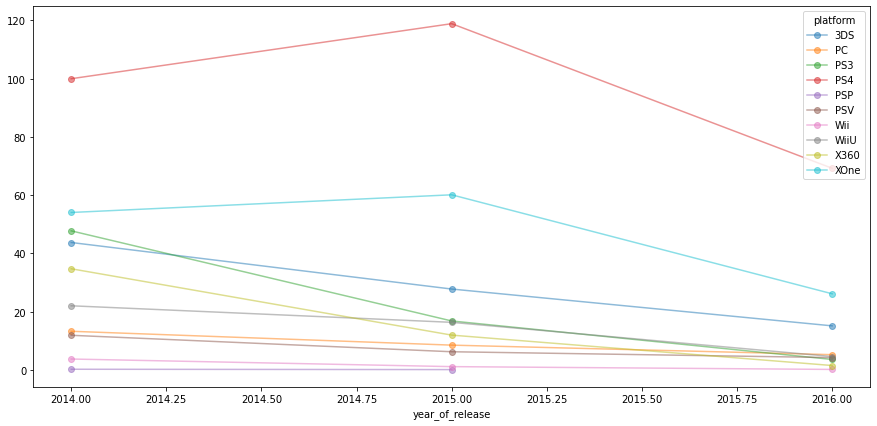

In [32]:
df_actual_years_pivot.plot(kind='line', style='-o', alpha=0.5, figsize=(15, 7))



PS4, я выбираю тебя! И, определенно, XOne. Оба начали продажи в 2013, оба имеют заметные пики в 2015 (а данные за 2016 точно собраны не все, судя по характеру данных и графиков). Вангую, что продажи на этих платформах должны быть хороши в будущем.

Построим "ящик с усами" для X360, Wii, PS3, PS4 и XOne.

<AxesSubplot:>

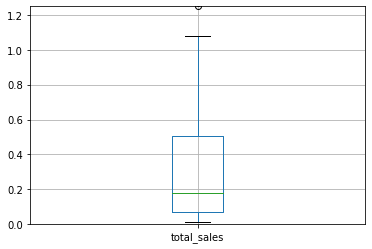

In [33]:
plt.ylim(0, 1.25)
df_actual_years[df_actual_years['platform'] == 'X360'].boxplot(['total_sales'])

<AxesSubplot:>

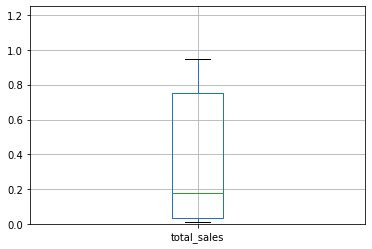

In [34]:
plt.ylim(0, 1.25)
df_actual_years[df_actual_years['platform'] == 'Wii'].boxplot(['total_sales'])

<AxesSubplot:>

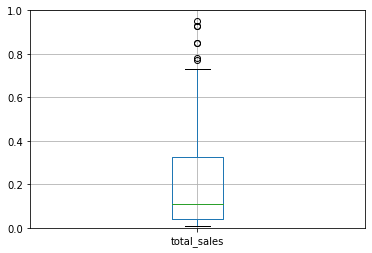

In [35]:
plt.ylim(0, 1)
df_actual_years[df_actual_years['platform'] == 'PS3'].boxplot(['total_sales'])

<AxesSubplot:>

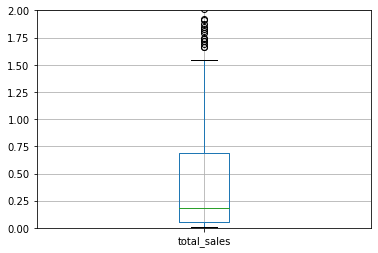

In [36]:
plt.ylim(0, 2)
df_actual_years[df_actual_years['platform'] == 'PS4'].boxplot(['total_sales'])

<AxesSubplot:>

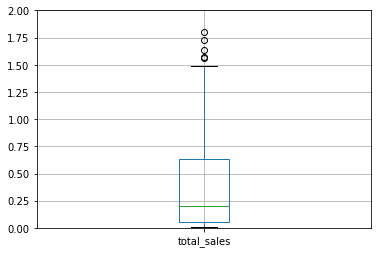

In [37]:
plt.ylim(0, 2)
df_actual_years[df_actual_years['platform'] == 'XOne'].boxplot(['total_sales'])

На каждой платформе были суперуспешные игры с большим количеством продаж. 
Например, у X360 и PS3 - более 20 миллионов, на Wii - более 80 млн, и PS4 с XOne уже отличились хорошими продажами на примерно 15 и 8 млн соответственно. Для платформ интереснее всего, конечно, значения, превышающие средние (причем, средние эти сильно отличаются от выбросов, в которых платформа заинтересована). Больше продаж-больше доход от игры.

При этом, средние значения по всем платформам довольно стандартные - в пределах 1,25 млн по всем.

По графикам видно, что более половины значений лежат ниже среднего для всех платформ. Это значит, что обычно продажи игр не велики.

#### Посмотрим, как на продажи X360 влияют отзывы пользоватей и критиков:

In [38]:
df_actual_years_x360 = df_actual_years[(df_actual_years['platform'] == 'X360') & (df_actual_years['critic_score'] > 0) & (df_actual_years['user_score'] > 0)]

#### Построим диаграмму рассеяния для оценок критиков:

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

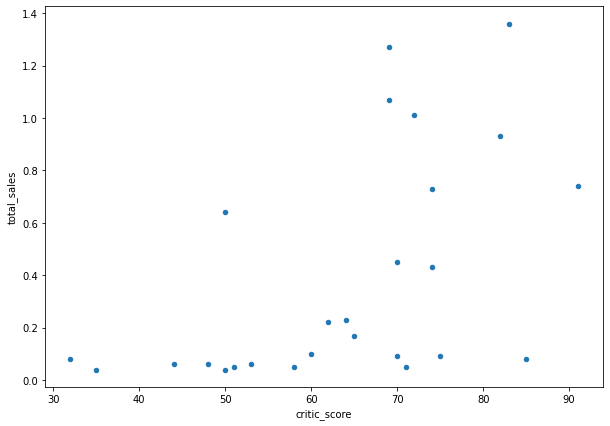

In [39]:
df_actual_years_x360.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,7))

Практически все данные выглядят довольно логично. Чем выше оценка критиков, тем больше продаж. Однако, хорошие продажи были у игр, получивших не высокие оценки крититков.

#### Построим диаграмму рассеяния для оценок пользователей:

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

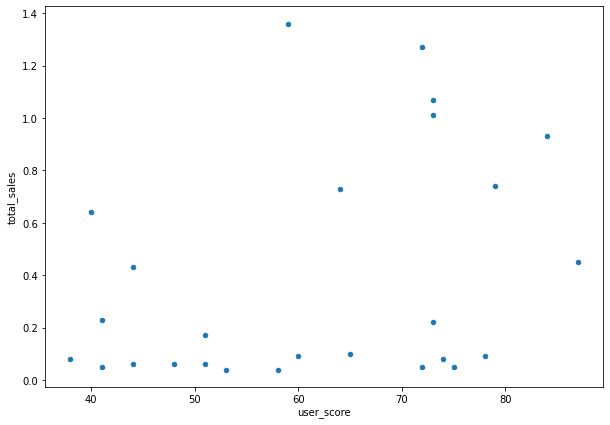

In [40]:
df_actual_years_x360.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,7))

А вот недовольных пользоватей, купивших популярные игры, значительно больше. Но в целом, тенденция прежняя - чем выше рейтинг, тем больше продаж.
Очевидно, что это касается и других платформ.

####  Посмотрим, как на продажи Wii влияют отзывы пользоватей и критиков

In [41]:
df_actual_years_xone = df_actual_years[(df_actual_years['platform'] == 'XOne') & (df_actual_years['critic_score'] > 0) & (df_actual_years['user_score'] > 0)]

####  Построим диаграмму рассеяния для оценок критиков:

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

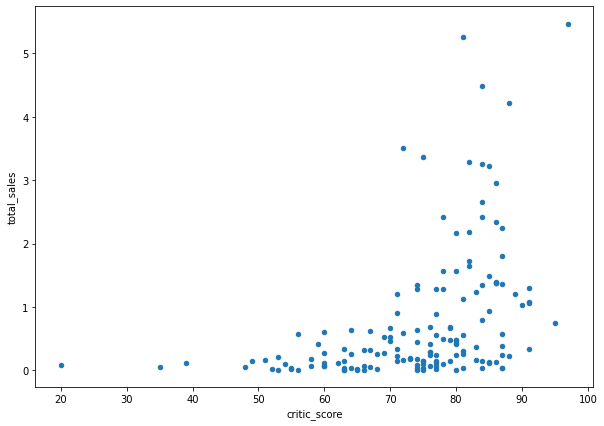

In [42]:
df_actual_years_xone.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,7))

Для XOne так же прослеживается зависимость роста продаж от роста оценки критиков.

####  Построим диаграмму рассеяния для оценок пользователей:

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

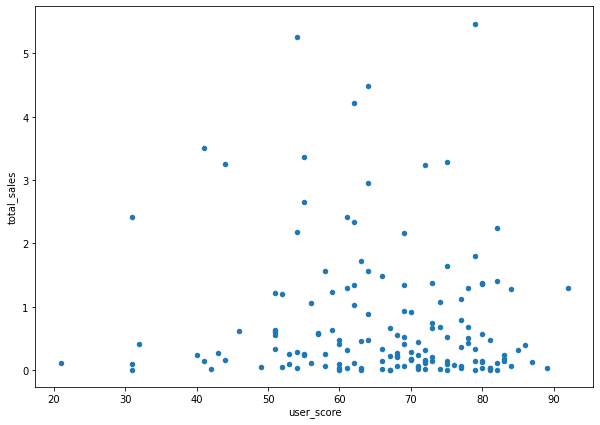

In [43]:
df_actual_years_xone.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,7))

А по оценкам пользователей для XOne зависимость более рассеянна.
Построим на общую корреляцию по всем платформам.

### Построим матрицу корреляции:

In [44]:
corr = df_actual_years.corr()
corr.style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.122977,-0.093408,-0.056134,-0.096834,0.017105,-0.032414,-0.117482
na_sales,-0.122977,1.000000,0.735920,0.264362,0.841484,0.213604,0.163664,0.913660
eu_sales,-0.093408,0.735920,1.000000,0.188675,0.930140,0.209984,0.150455,0.915583
jp_sales,-0.056134,0.264362,0.188675,1.000000,0.170780,-0.037457,-0.047662,0.418281
other_sales,-0.096834,0.841484,0.930140,0.170780,1.000000,0.201837,0.149126,0.935091
critic_score,0.017105,0.213604,0.209984,-0.037457,0.201837,1.000000,0.794176,0.202651
user_score,-0.032414,0.163664,0.150455,-0.047662,0.149126,0.794176,1.000000,0.146120
total_sales,-0.117482,0.913660,0.915583,0.418281,0.935091,0.202651,0.146120,1.000000


Можно заметить, что на количество продаж оценка пользователей и критиков влияет примерно одинаково (но оценка критиков сильнее, что очень логично - некоторые пользователи покупают игры после отзыва критиков).

А слабая отрицательная корреляция продаж с годом, на мой взгляд, указывает на спад продаж.

#### Посмотрим, как распределены игры по жанрам:

In [45]:
df_actual_years.groupby('genre')['total_sales'].mean().sort_values()

genre
Adventure       0.094865
Strategy        0.107027
Puzzle          0.157857
Simulation      0.298409
Action          0.322068
Misc            0.332301
Racing          0.398841
Role-Playing    0.459005
Fighting        0.470333
Platform        0.476053
Sports          0.680000
Shooter         1.335469
Name: total_sales, dtype: float64

Самые популярные жанры игр: Shooter, Sports, Misc.

Антипопулярны в числе проданных копий Puzzle, Strategy

## Портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).
Самые популярные жанры (топ-5).
Влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### Определим самые популярные платформы по регионам:

<AxesSubplot:xlabel='platform'>

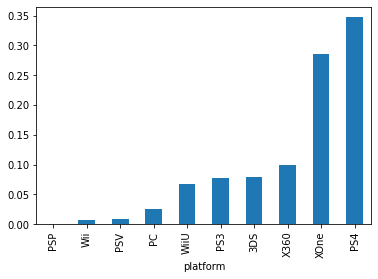

In [46]:
platforms_na = df_actual_years.groupby('platform')['na_sales'].sum() / df_actual_years['na_sales'].sum()
platforms_na = platforms_na.sort_values()
platforms_na.plot(kind='bar')

В Северной Америке самые популярные платформы - PS4 и XOne.

<AxesSubplot:xlabel='platform'>

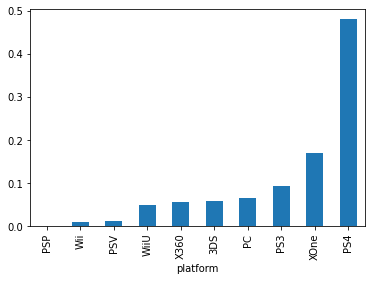

In [47]:
platforms_eu = df_actual_years.groupby('platform')['eu_sales'].sum() / df_actual_years['eu_sales'].sum()
platforms_eu = platforms_eu.sort_values()
platforms_eu.plot(kind='bar')

В Европе с большим отрывом лидирует PS4. В процентном отношении других платформ намного меньше.

<AxesSubplot:xlabel='platform'>

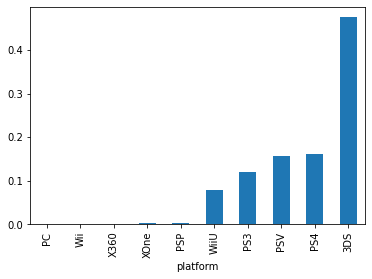

In [48]:
platforms_jp = df_actual_years.groupby('platform')['jp_sales'].sum() / df_actual_years['jp_sales'].sum()
platforms_jp = platforms_jp.sort_values()
platforms_jp.plot(kind='bar')

В Японии популярнее всего 3DS.

#### Определим самые популярные жанры по регионам:

<AxesSubplot:xlabel='genre'>

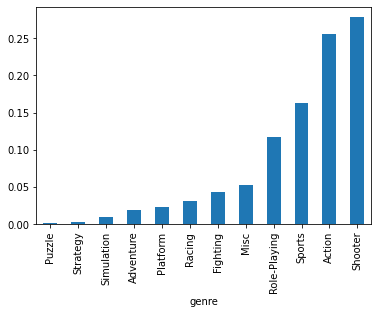

In [49]:
genre_na = df_actual_years.groupby('genre')['na_sales'].sum() / df_actual_years['na_sales'].sum()
genre_na = genre_na.sort_values()
genre_na.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

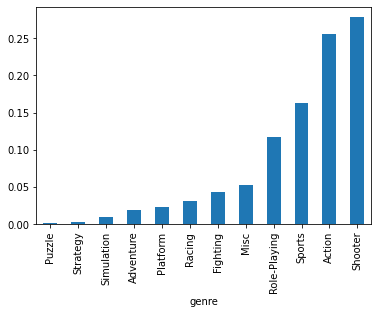

In [50]:
genre_eu = df_actual_years.groupby('genre')['eu_sales'].sum() / df_actual_years['eu_sales'].sum()
genre_eu = genre_na.sort_values()
genre_eu.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

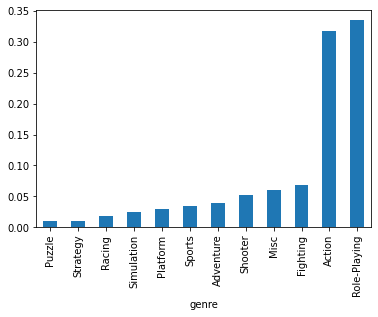

In [51]:
genre_jp = df_actual_years.groupby('genre')['jp_sales'].sum() / df_actual_years['jp_sales'].sum()
genre_jp = genre_jp.sort_values()
genre_jp.plot(kind='bar')

Япония, как обычно, имеет весьма специфические вкусы, которые отличаются от "средних по миру". Ролевые игры рулят и в играх, ничего удивительного.
А в Северной Америке и Европе топ-3 Action, Shooter, Sports7

#### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

<AxesSubplot:xlabel='rating'>

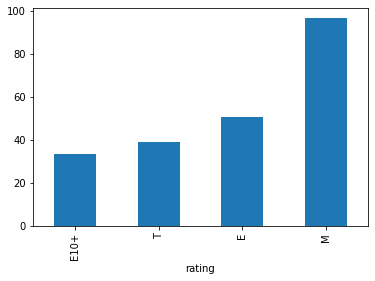

In [52]:
rating_na = df_actual_years[df_actual_years['rating'] != -1].groupby('rating')['na_sales'].sum()
rating_na = rating_na.sort_values()
rating_na.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

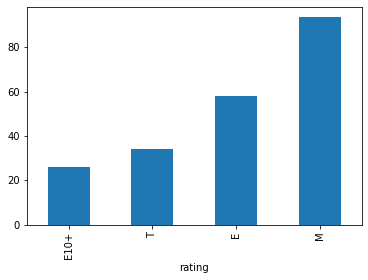

In [53]:
rating_eu = df_actual_years[df_actual_years['rating'] != -1].groupby('rating')['eu_sales'].sum()
rating_eu = rating_eu.sort_values()
rating_eu.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

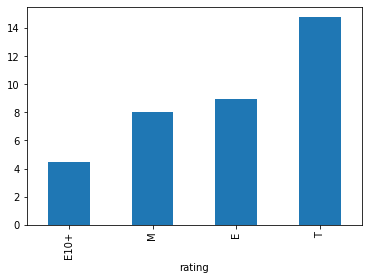

In [54]:
rating_jp = df_actual_years[df_actual_years['rating'] != -1].groupby('rating')['jp_sales'].sum()
rating_jp = rating_jp.sort_values()
rating_jp.plot(kind='bar')

E       - для всех,
E10+     > 10 лет,
EC       - для детей младшего возраста,
M        > 17 лет,
RP        - рейтинг ожидается,
T        13-19 лет.

Все покупают игры для всех) Все довольно логично.
Но если в Европе и Северной Америке на первом месте по продажам игры 17+, то в Японии 13-19 лет. Подростки там точно играют чаще.

## Проверка гипотез

### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score) платформы PC 

H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ средний пользовательский рейтинг (user_score) платформы PC 

alpha = 0.05

In [58]:
xbox_rating = df_actual_years[(df_actual_years['platform'] =='XOne') & (df_actual_years['user_score'] >= 0)]['user_score']
pc_rating = df_actual_years[(df_actual_years['platform'] =='PC') & (df_actual_years['user_score'] >= 0)]['user_score']

results = st.ttest_ind(xbox_rating, pc_rating, equal_var=False) 

alpha = 0.05 # alpha = задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')
# условный оператор с выводом строки с ответом

0.11601398086668918
Не получилось отвергнуть нулевую гипотезу 


Предложенная гипотеза нашла подтверждение. Таким образом, делаем вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра Sports

H_a: Средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра Sports

alpha = 0.05

In [59]:
action_rating = df_actual_years[(df_actual_years['genre'] =='Action') & (df_actual_years['user_score'] >= 0)]['user_score']
sports_rating = df_actual_years[(df_actual_years['genre'] =='Sports') & (df_actual_years['user_score'] >= 0)]['user_score']

results = st.ttest_ind(action_rating, sports_rating, equal_var=False) 

alpha = 0.05 # alpha = задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')
# условный оператор с выводом строки с ответом

1.182555038264477e-14
Отвергаем нулевую гипотезу


Предложенная гипотеза нашла подтверждение. Можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

Обе гипотезы не нашли подтверждение в ходе расчетов.

## Общий вывод

В ходе работы был проанализирован датасет с данными по продажам игр на разных платформах и их рейтингом от критиков и пользователей.

На начальном этапе исследования была проделана работа по приведению данных к необходимым для дальнейшего исследования типам, удалению дубликатов и строк с пропущенными данными. 

Пропуски в столбцах были заменены на значения-"индикаторы", которые явно выбиваются из логики данных, но позволяют сохранить имеющиеся данные. Для замены было выбрано значение "-1".

Так же в датасет был добавлен дополнительный столбец с данными о суммарных продаж во всех регионах.

В ходе исследования были найдены закономерности о продолжительности "жизни" платформы и тенденциям по росту и падению продаж на платформах. Было выявлено, что как правило, цикл "жизни" популярных платформ составляет около 10-11 лет и эта величина бфла выбрана для дальнейшего анализа и построения модели для прогноза продаж в следующие годы.

Были найдены 5 потенциально прибыльных платформ: X360, Wii, PS3, PS4 и XOne. Было выявлено, что на количество продаж оценка пользователей и критиков влияет примерно одинаково (но оценка критиков сильнее, что очень логично - некоторые пользователи покупают игры после отзыва критиков).
А так же присутствует слабая отрицательная корреляция продаж с годом,  что, на мой взгляд, указывает на имеющийся спад продаж игр в целом.

В ходе исследования портрета пользователей, было отмечено, что вкусы японцев, а так же время начала геймерства отличается от того, что актуально в Северной Америке и Европе. Не удивительно, что рынок для Японии развивается иначе.

Были подтверждены обе постороенные гипотезы за актуальный период и сделаны выводы, что:
средние пользовательские рейтинги жанров Action и Sports разные;
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

Итак, рынок немобильных игр затухает, его пик пришелся на 2008-2009 гг и с этого времени падает. У каждой платформы есть суперпопулярные игры, которые приносят огромную прибыль, но, несмотря на это, продаж с каждым годом все меньше. Сильнее всего продажи зависят от рейтинга критиков, так что, есть предложение переводить критиков на свою сторону)